# Business Context

The client company is a telecom company. They have a dataset containing demographic information about their customers, customer account information such as how long they have been a customer, their type of contract, payment method etc. The dataset also includes which type of services the customer has signed up for. The dataset is available on kaggle in the following link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn. 

The company needs a data scientist to answer the following business questions.

# Business questions

1/ What is the proportion of customers who churn?

2/ How much is the percentage of churn per gender?

3/ How much is the churn percentage for each payment method?

4/ What is the average monthly charge for the customers?

5/ What is the distribution of the monthly charges of the customers?

6/ What is the proportion of cusomers per type of contract?

7/ Is there a correlation between monthly charges and total charges?

8/ What is the average tenure of churning customers

## Data Exploration

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Customer_Churn.csv', sep = ';')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

Our dataset has 7043 rows and 21 columns

## Data Preprocessing

In [5]:
df.isnull().sum().sum()

9

The proportion of missing values is less than 5% therefore we will drop the missing values

In [6]:
df.dropna(inplace = True)

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

## Checking Format consistency

In [9]:
df1 = df.drop(columns = ['customerID'])
categorical = df.select_dtypes(include=['int64', 'float64'])
for i in df1.columns:
    print(i, df1[i].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1. 34.  2. 45.  8. 22. 28. 13. 16. 58. 49. 52. 71. 10. 21. 12. 30. 47.
 72. 17. 27.  5. 46. 11. 70. 63. 69. 43. 15. 25. 60. 18. 66.  9.  3. 31.
 50. 64. 62. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26.  0.
 39.]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCha

The format of the input looks consistent

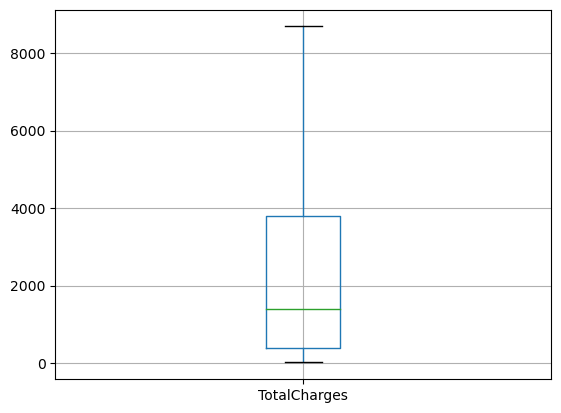

In [10]:
df.boxplot(column = 'TotalCharges')
plt.show()

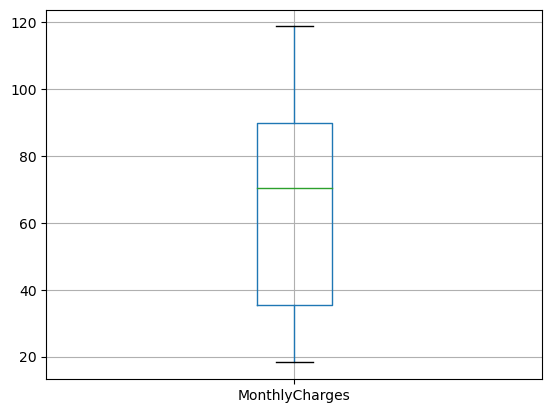

In [11]:
df.boxplot(column = 'MonthlyCharges')
plt.show()

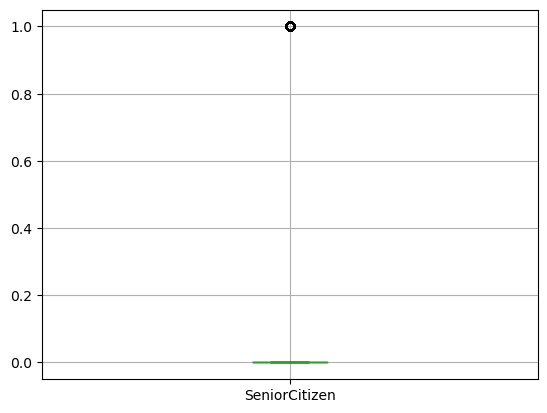

In [12]:
df.boxplot(column = 'SeniorCitizen')
plt.show()

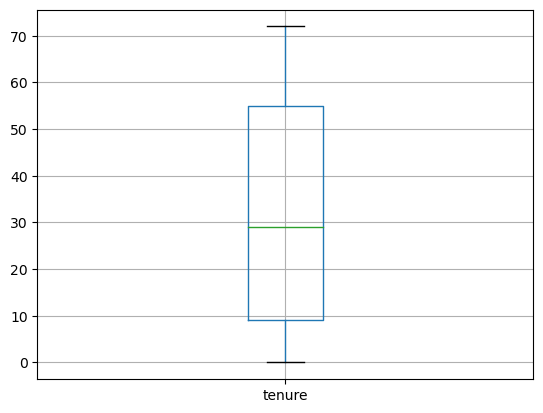

In [13]:
ax = df.boxplot(column = 'tenure')
plt.show()

We don't have outliers in the dataset

## 1/ What is the proportion of customers who churn?

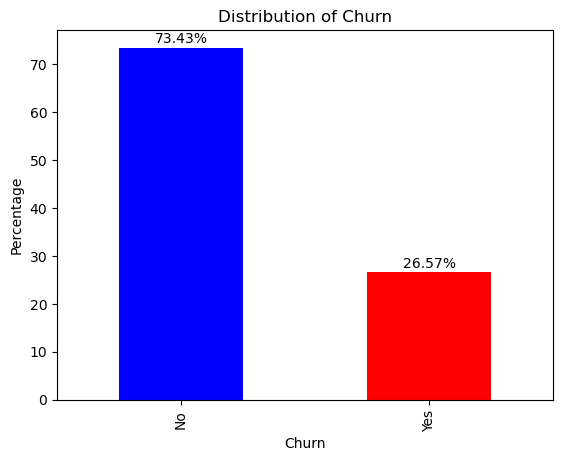

In [14]:
from matplotlib import pyplot as plt
churn_counts = df['Churn'].value_counts(normalize=True) * 100
ax = churn_counts.plot(kind='bar', color=['blue', 'red'])  

for i, value in enumerate(churn_counts):
    ax.text(i, value + 1, f'{value:.2f}%', ha='center')

plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.show()

The chart shows that 73% of customers are loyal and 24% of customers are churning

## How much is the percentage churn per gender

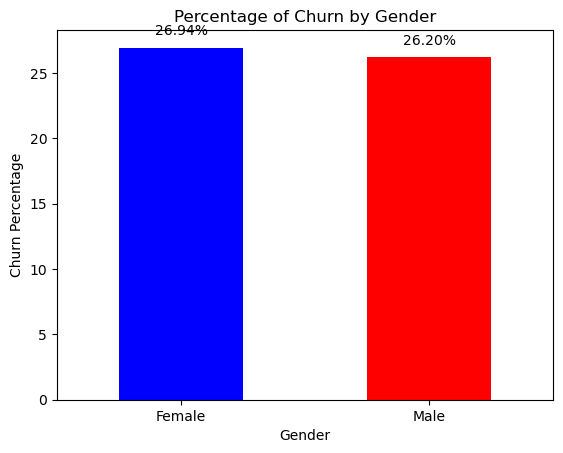

In [15]:
churn_counts = df.groupby(['gender', 'Churn']).size().unstack()
churn_percentage_per_gender = (churn_counts['Yes'] / churn_counts.sum(axis=1)) * 100

ax = churn_percentage_per_gender.plot(kind='bar', color=['blue', 'red'])  

for i, value in enumerate(churn_percentage_per_gender):
    ax.text(i, value + 1, f'{value:.2f}%', ha='center')

plt.title('Percentage of Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Percentage')
plt.xticks(rotation=0)  
plt.show()

Based on the graph above, the churn rates are similar between the two genders at around 26%

## 3/ What is the percentage of churn for each payment method?

In the next line of code we check all the possible payment methods

In [16]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In the next cell, We will shorten the values of the column Payment method for convenience in the visualization

In [17]:
import numpy as np
df['PaymentMethod'] = np.where(df['PaymentMethod'] == 'Bank transfer (automatic)', 'Bank transfer', df['PaymentMethod'])
df['PaymentMethod'] = np.where(df['PaymentMethod'] == 'Credit card (automatic)', 'Credit Card', df['PaymentMethod'])

In [18]:
churn_counts = df.groupby(['PaymentMethod', 'Churn']).size().unstack()

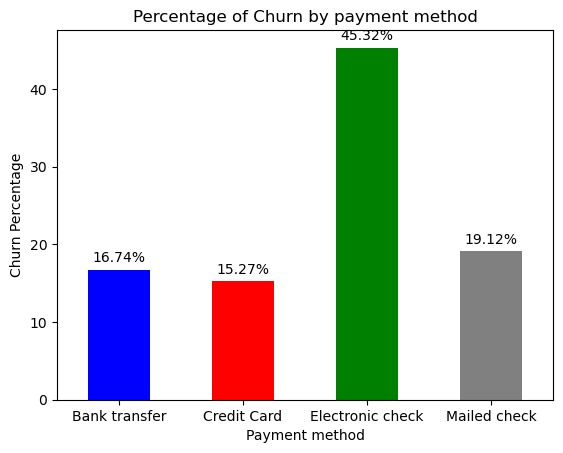

In [19]:
churn_percentage_per_pmt = (churn_counts['Yes'] / churn_counts.sum(axis=1)) * 100

ax = churn_percentage_per_pmt.plot(kind='bar', color=['blue', 'red', 'green', 'grey'])  

for i, value in enumerate(churn_percentage_per_pmt):
    ax.text(i, value + 1, f'{value:.2f}%', ha='center')

plt.title('Percentage of Churn by payment method')
plt.xlabel('Payment method')
plt.ylabel('Churn Percentage')
plt.xticks(rotation=0)  
plt.show()

From the graph above, we conclude that cusomters who use electronic check as their payment method are more likely to churn. We can conclude from that that there are technical problems with Electronic check. This might suggest that there are some problems with that payment method

## 4/ What is the median monthly charge

In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7034.000000,7034.000000,7034.000000,7023.000000
mean,0.162212,32.361956,64.748003,2282.040923
std,0.368671,24.560596,30.092194,2266.275617
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.200000
50%,0.000000,29.000000,70.350000,1396.250000
75%,0.000000,55.000000,89.850000,3794.975000
max,1.000000,72.000000,118.750000,8684.800000


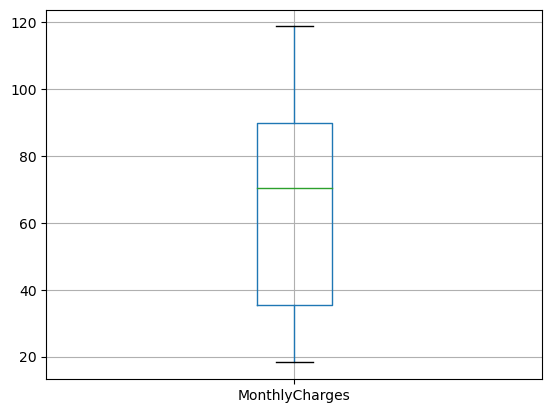

In [21]:
df.boxplot(column = 'MonthlyCharges')
plt.show()

From the graph above the average monthly charge is 64.76. Which means 50% of customers are charged more than 70.35 euros per month.

## 5/ What is the distribution of monthly charges

In [22]:
df['MonthlyCharges'].hist()

<Axes: >

### The majority of customers have a monthly charge between 20 and 30 euros. The hightest monthly charge is 120 euros and the lowest is 18 euros.

In [23]:
churn_counts = df.groupby(['gender', 'Churn']).size().unstack()

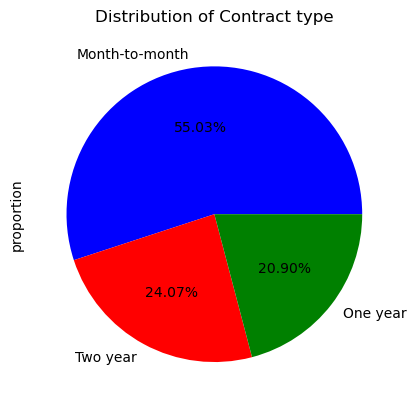

In [24]:
from matplotlib import pyplot as plt

churn_counts = df['Contract'].value_counts(normalize=True) * 100
ax = churn_counts.plot(kind='pie', colors=['blue', 'red', 'green'], autopct='%1.2f%%')  

plt.title('Distribution of Contract type')
plt.show()

Based on the pie chart above, the majority of the customers have a month to month contract with 55%, then 24% have a two year contract and 20.93% have a one-year contract

## 7/ Is there a correlation between monthly charges and total charges?

Numerical columns:
      SeniorCitizen  tenure  MonthlyCharges  TotalCharges
0                 0     1.0           29.85         29.85
1                 0    34.0           56.95       1889.50
2                 0     2.0           53.85        108.15
3                 0    45.0           42.30       1840.75
4                 0     2.0           70.70        151.65
...             ...     ...             ...           ...
7037              0    72.0           21.15       1419.40
7038              0    24.0           84.80       1990.50
7039              0    72.0          103.20       7362.90
7040              0    11.0           29.60        346.45
7041              1     4.0           74.40        306.60

[7034 rows x 4 columns]


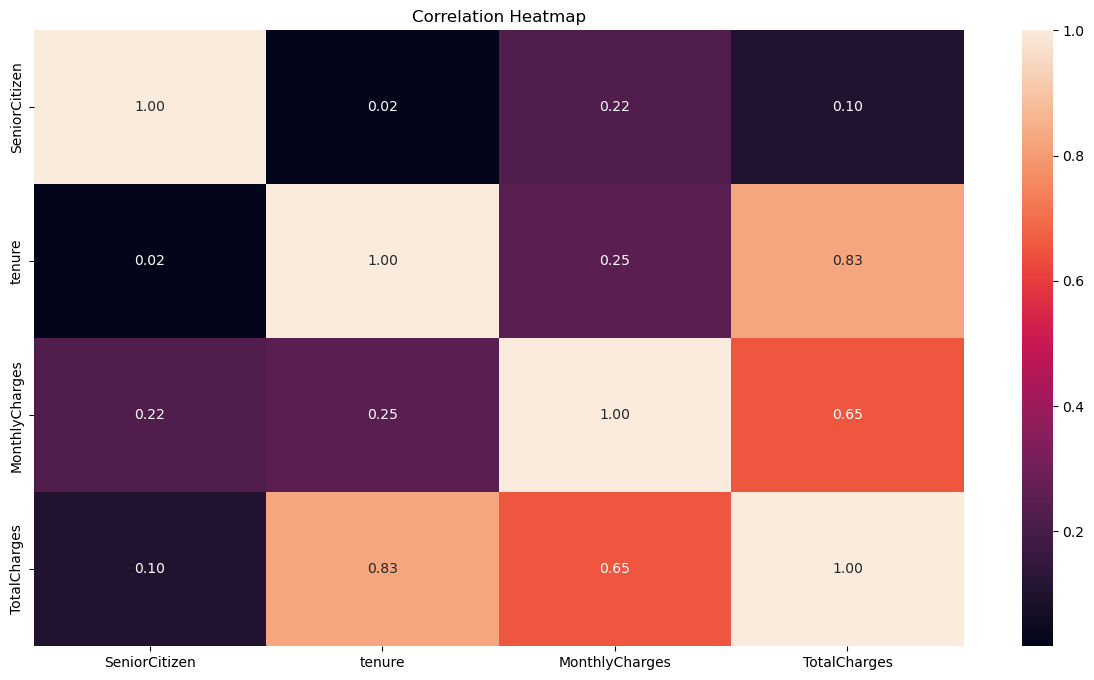

In [25]:
import seaborn as sns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Display the numerical columns
print("Numerical columns:")
print(numerical_columns)

# Generate correlation heatmap
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap showcases a strong correlation between TotalCharges and tenure, and between MonthlyCharges and TotalCharges. This makes sense because the longer a customer stays, the more charges he had to pay in total and the bigger the Monthly charge, the bigger the total charge

## 8/ What is the average tenure of churning and non churning customers?

In [26]:
df1 = df[['Churn','tenure']]

In [27]:
tenure_groups = df1.groupby('Churn').mean()

In [28]:
tenure_groups

,tenure
Churn,
No,37.566505
Yes,17.979133


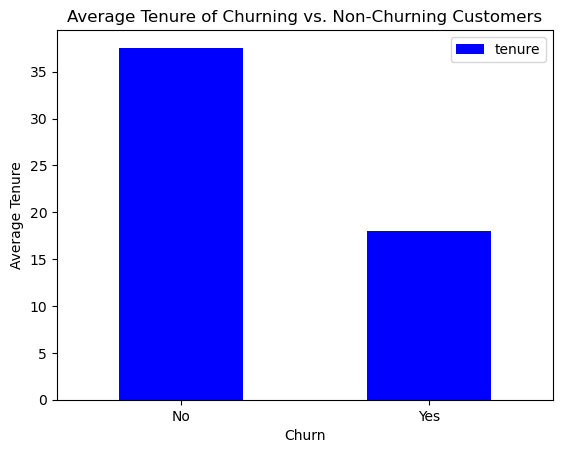

In [29]:
ax = tenure_groups.plot(kind='bar', color=['blue', 'red'])

# Adding labels and title
plt.title('Average Tenure of Churning vs. Non-Churning Customers')
plt.xlabel('Churn')
plt.ylabel('Average Tenure')
plt.xticks(rotation=0)  # to avoid rotating x-axis labels


plt.show()

As we see in the graph above, the average tenure for churning customers is much shorter at 17 but for non churning. This means after 17 months, the customer is more likely to stay loyal

## Conclusion and discussion:
We found that Customer churn happens more frequently with customers who choose Electronic check as their payment method. This suggests that there might be some technical problems with this payment approach. It is also noteworthy that churning customers have an average tenure of less than 17 months. This suggests that new customers who still haven't reached 17 months yet might need better offers or a better service in order to make sure they stay loyal